In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Пример данных (можно заменить на свои)
# Генерация временного ряда с трендом и шумом
np.random.seed(42)
time = np.arange(0, 100, 0.1)
data = np.sin(time) + np.random.normal(0, 0.1, len(time))

# Преобразуем данные в DataFrame для удобства
df = pd.DataFrame(data, columns=['value'])

# Визуализация данных
plt.plot(df['value'])
plt.title('Временной ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()

In [12]:
# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['value'].values.reshape(-1, 1))

# Подготовка данных для обучения
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Длина временного окна
X, y = create_sequences(scaled_data, seq_length)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Построение модели
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Вывод структуры модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.1410 - val_loss: 0.0338
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0236 - val_loss: 0.0202
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0160
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0140
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.0113
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0083
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0044
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 11/50
25/25 

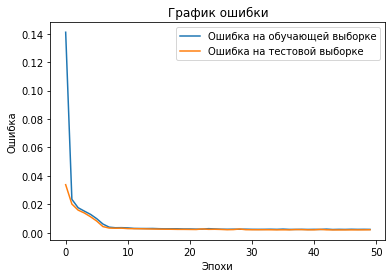

In [14]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Визуализация процесса обучения
plt.plot(history.history['loss'], label='Ошибка на обучающей выборке')
plt.plot(history.history['val_loss'], label='Ошибка на тестовой выборке')
plt.title('График ошибки')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


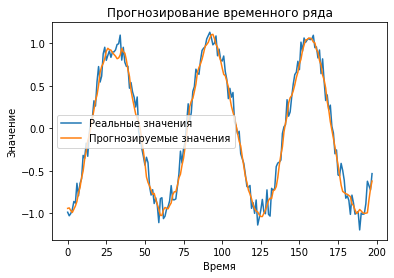

In [15]:
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Обратное преобразование данных к исходному масштабу
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Визуализация результатов
plt.plot(y_test_actual, label='Реальные значения')
plt.plot(y_pred_actual, label='Прогнозируемые значения')
plt.title('Прогнозирование временного ряда')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Вычисление ошибок
mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)

print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Средняя абсолютная ошибка (MAE): {mae}')

Среднеквадратичная ошибка (MSE): 0.013332085940893473
Средняя абсолютная ошибка (MAE): 0.091699691855165


1/1 [==============================] - 0s 11ms/step


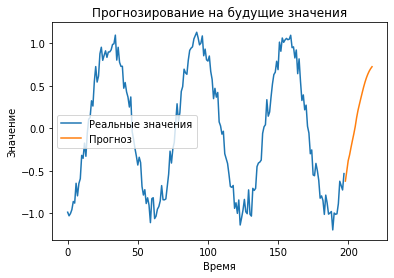

In [17]:
# Прогнозирование на будущие значения
future_steps = 20
future_predictions = []

last_sequence = X_test[-1]  # Последняя известная последовательность

for _ in range(future_steps):
    next_prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction)

# Обратное преобразование прогнозируемых значений
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Визуализация прогноза
plt.plot(y_test_actual, label='Реальные значения')
plt.plot(range(len(y_test_actual), len(y_test_actual) + future_steps), future_predictions_actual, label='Прогноз')
plt.title('Прогнозирование на будущие значения')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()